## 0) Importando Bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## 1) Lendo o arquivo

#### Fonte Kaggle:https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset

In [8]:
turbina = pd.read_csv("T1.csv")

# mudando o nome das colunas
turbina.columns = ["data/hora", "ActivePower(KW)", "WindSpeed(m/s)", "CurvaTeorica(KWh)","DirecaoVento"]

# deletanto coluna
del turbina["DirecaoVento"]

# mudando para date/time
turbina["data/hora"] = pd.to_datetime(turbina["data/hora"])


display(turbina)

,data/hora,ActivePower(KW),WindSpeed(m/s),CurvaTeorica(KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


## 2) Plotando os dados em um gráfico - Real

<AxesSubplot:xlabel='WindSpeed(m/s)', ylabel='ActivePower(KW)'>

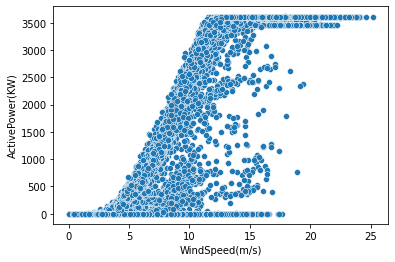

In [9]:
sns.scatterplot(data=turbina, x="WindSpeed(m/s)", y="ActivePower(KW)")

## 3) Plotando os dados em um gráfico - Teórica

<AxesSubplot:xlabel='WindSpeed(m/s)', ylabel='CurvaTeorica(KWh)'>

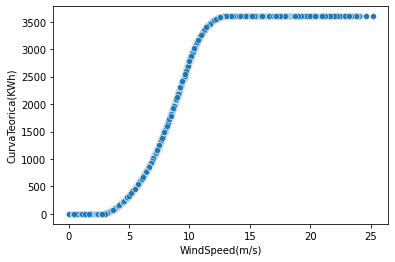

In [10]:
sns.scatterplot(data=turbina, x="WindSpeed(m/s)", y="CurvaTeorica(KWh)")

## 4) Criando "limites aceitáveis" baseado na curva teórica


In [17]:
pot_real= turbina["ActivePower(KW)"].tolist()

pot_teorica= turbina["CurvaTeorica(KWh)"].tolist()

pot_max = []

pot_min = []

dentro_limite = []

for potencia in pot_teorica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.9)

for p, potencia in enumerate(pot_real):
    if potencia>=pot_min[p] and potencia<=pot_max[p]:
        dentro_limite.append('Dentro')
    elif potencia == 0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')
   
# quantidade dentro do limite
print(dentro_limite.count('Dentro')/len(dentro_limite))   

0.4904809024341975


## 5) Adicionando lista "dentro_limite" ao dataframe:

In [18]:
turbina['DentroLimite'] = dentro_limite

display(turbina)

,data/hora,ActivePower(KW),WindSpeed(m/s),CurvaTeorica(KWh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Dentro
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


## 6) Plotando novamente o gráfico:

<AxesSubplot:xlabel='WindSpeed(m/s)', ylabel='ActivePower(KW)'>

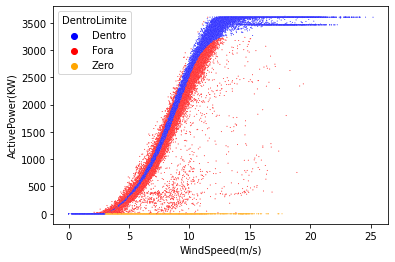

In [24]:
cores = {"Dentro":'blue', 'Fora':'red', 'Zero':'orange'}

sns.scatterplot(data=turbina, x="WindSpeed(m/s)", y="ActivePower(KW)", hue='DentroLimite', s=1, palette=cores)

